# py-salt

The py-salt package rovides robust tools to perform cross-dataset label aggregation, explore hierarchical relationships and visualize label mappings in *SALT*. The main module to be used in **event_mapping.py** which implements functions to perform the operations mentioned above. But except this, **dataset_info.py** also provides useful information about the datasets that are mapped to *SALT*.

An overview of the modules:

- **dataset_info.py**: Provides basic information for the mapped datasets.

- **mapping_manager.py**: Abstract module with mapping/searching functions.

- **event_mapping.py**: Module to explore *SALT*. Used for label searching/aggregation/visualization.

- **general_utils.py**: General utilities used by the rest of the modules.

## Mapped Datasets

Let's get some information regarding the datasets that are mapped to *SALT*.

In [1]:
from py_salt import dataset_info, event_mapping

Let's see which are the mapped datasets

In [2]:
dataset_info.get_mapped_dataset()

['AudioSet',
 'AudioSet strong',
 'FreeSound 50k',
 'ESC-50',
 'SINGA:PURA',
 'MAESTRO Real - Multi-Annotator Estimated Strong Labels',
 'Urban Sound & Sight',
 'MAVD-traffic',
 'IDMT-traffic',
 'UrbanSound8k',
 'TUT Sound Events 2016',
 'TUT Sound Events 2017',
 'MAESTRO Synthetic – Multiple Annotator Estimated STROng labels',
 'SONY-UST',
 'ARCHEO',
 'TAU NIGENS Spatial Sound Events 2020',
 'TUT Rare Sound Events 2017',
 'CHiME-Home',
 'ReaLISED: Real-Life Indoor Sound Event Dataset',
 'DESED',
 'STARSS22: Sony-TAu Realistic Spatial Soundscapes 2022 dataset',
 'STARSS23: Sony-TAu Realistic Spatial Soundscapes 2023',
 'MATS – Multi-Annotator Tagged Soundscapes',
 'Nonspeech7k',
 'AnimalSound',
 'NIGENS (Neural Information Processing group GENeral sounds)']

Let's check information for SINGA:PURA. The info dictionary will provide information regarding the dataset's name, a brief description, a url to access the dataset's website and also information regarding its audio data.

In [3]:
dataset_info.Singapura().get_info()

{'name': 'SINGA:PURA',
 'mapping_id': 'Singapura',
 'url': 'https://paperswithcode.com/dataset/singa-pura/',
 'subset_of': 'None',
 'description': 'Strongly-labelled polyphonic urban sound dataset with spatiotemporal context'}

Let's see another example, this time for TUT Sound Events 2016.

In [4]:
dataset_info.TUTSoundEvents2016().get_info()

{'name': 'TUT Sound Events 2016',
 'mapping_id': 'TUTSoundEvents2016',
 'url': 'https://zenodo.org/records/45759',
 'subset_of': 'None',
 'description': 'TUT Sound events 2016, development dataset consists of 22 audio recordings from two acoustic scenes: Home and Residential area.',
 'source_audio': 'TUT Acoustic Scenes: "home" and "residential area"'}

## Event Mapping Exploration

Alright, now let's move to the core of py-salt, which is none other than the event mapping module. In this introductory tutorial we will explore basic utilites of py-salt. For detailed examples refer to the rest of the examples. For starters, let's simply observe the form of *SALT* mapping.

In [5]:
# Init Event Explorer class
e = event_mapping.EventExplorer()

e.map_df

,standard_event,dataset_label,standard_action,standard_activity,dataset
0,vehicle,Accelerating_and_revving_and_vroom,engine_accelerating,,Fsd50k
1,vehicle,"Accelerating, revving, vroom",engine_accelerating,,AudioSet_strong
2,vehicle,"Accelerating, revving, vroom",engine_accelerating,,AudioSet
3,vehicle,Air brake,air_brake,,AudioSet
4,vehicle,Air brake,air_brake,,AudioSet_strong
...,...,...,...,...,...
7301,sound_of_things,machineri,,,NoisenseDB
7302,lock,Lock,,,AudioSet_strong
7303,chain,Chain,,,AudioSet_strong
7304,audio_feedback,Audio feedback,,,AudioSet_strong


As we can see, the mapping is quite simple: The first column contains the standard label, the second and third columns contain the dataset default label which is mapped to the standard label of the same row and the dataset's name respectively.

### Label Aggregation

Let's see how we can gather dataset labels from multiple datasets: This can be achieved either by using a standard label, or a dataset label directly.

In [6]:
e.get_mapping_for_std_label('car_horn')

{'Singapura': ['Car horn'],
 'UrbanSound8K': ['car horn'],
 'ESC50': ['car_horn'],
 'MAESTROsynthetic': ['car_horn'],
 'SONYC': ['car-horn'],
 'AudioSet_strong': ['Toot', 'Vehicle horn, car horn, honking, toot'],
 'AudioSet': ['Toot', 'Vehicle horn, car horn, honking'],
 'Fsd50k': ['Vehicle_horn_and_car_horn_and_honking']}

In case a user is more familiar with a dataset's default label than its standard label, we can have the same result using the dataset label instead:

In [7]:
e.get_mapping_for_dataset_label('Car horn') # Singapura's default label

{'Singapura': ['Car horn'],
 'UrbanSound8K': ['car horn'],
 'ESC50': ['car_horn'],
 'MAESTROsynthetic': ['car_horn'],
 'SONYC': ['car-horn'],
 'AudioSet_strong': ['Toot', 'Vehicle horn, car horn, honking, toot'],
 'AudioSet': ['Toot', 'Vehicle horn, car horn, honking'],
 'Fsd50k': ['Vehicle_horn_and_car_horn_and_honking']}

### Hierarchical Label Searching

Let's now explore how we can get a standard label's parents, siblings and children. Note that the acnenstors/descendants are also standard labels of *SALT*

In [8]:
# Define a standard label
std_label = 'vehicle_horn'

parent = e.get_parent_label_for_std_label(std_label)
siblings = e.get_siblings_labels_for_std_label(std_label)
children = e.get_children_labels_for_std_label(std_label)

print('Parent label(s):', parent)
print('Sibling label(s):', siblings)
print('Children label(s):', children)

Parent label(s): ['road_vehicle', 'alarm_signal']
Sibling label(s): {'road_vehicle': ['emergency_vehicle', 'car', 'motorcycle', 'large_vehicle', 'engine_accelerating', 'vehicle_passing_by', 'brakes_squeaking'], 'alarm_signal': ['error_signal', 'CO_detector', 'whistle', 'foghorn_ringing', 'buzzer_ringing', 'siren_ringing', 'car_alarm_ringing', 'fire_alarm_ringing', 'telephone', 'bicycle_bell', 'alarm_clock_ringing', 'doorbell']}
Children label(s): ['air_horn_or_truck_horn', 'car_horn']


Notice that for sibling labels we get a variety of labels from different domains. This is normal as the standard label "vehicle_horn" has 2 parent labels: "road_vehicle" and "alarm_signal".

Furthermore, we can get all coarser/finer grained standard labels for a given label. Let's see an example:

In [9]:
std_label = 'toothbrush'

coarse_labels = e.get_coarse_labels_for_std_label(std_label)
fine_labels = e.get_fine_labels_for_std_label(std_label)

print('Coarse labels:', coarse_labels)
print('Fine labels:', fine_labels)

Coarse labels: ['domestic_sounds', 'bathroom_sounds', 'brushing_teeth', 'sound_of_things']
Fine labels: ['electric_toothbrush']


Finally, we can retrieve the coarse-to-fine path for a standard label. Let's check for the previous used labels "car_horn" and "toothbrush". 

In [10]:
e.get_paths_to_label('car_horn')

[['sound_of_things', 'vehicle', 'road_vehicle', 'vehicle_horn', 'car_horn'],
 ['sound_of_things', 'alarm_signal', 'vehicle_horn', 'car_horn']]

In [11]:
e.get_paths_to_label('toothbrush')

[['sound_of_things', 'domestic_sounds', 'brushing_teeth', 'toothbrush'],
 ['sound_of_things', 'bathroom_sounds', 'brushing_teeth', 'toothbrush']]

Notice that there can be more than 1 path to reach a standard label. This usually depends on the nature of the event that the label defines.

### Dataset Intersection

An intresting functionality of py-salt is finding common labels between different datasets. Below, we will examine 2 different examples of this functionality. Let's first see the list of mapped datasets that we can choose from:

In [12]:
e.get_mapped_datasets()

['Fsd50k',
 'AudioSet_strong',
 'AudioSet',
 'ESC50',
 'Singapura',
 'MAESTROreal',
 'TUTSoundEvents2017',
 'Urbansas',
 'MAVDtraffic',
 'IDMTtraffic',
 'UrbanSound8K',
 'TUTSoundEvents2016',
 'MAESTROsynthetic',
 'SONYC',
 'Archeo',
 'NoisenseDB',
 'TAUNIGENSSpatialSoundEvents2020',
 'Nigens',
 'TUTRareSoundEvents',
 'CHiMEHome',
 'ReaLISED',
 'DESEDReal',
 'Starss22',
 'Starss23',
 'MATS',
 'Nonspeech7k',
 'AnimalSound']

#### Example 1: Urban Sound Monitoring Datasets

In [13]:
dataset_list = ['Urbansas', 'Singapura', 'MAVDtraffic', 'IDMTtraffic', 'UrbanSound8K', 'SONYC']

# Get all standard events that are common across all datasets
std_labels = e.find_datasets_intersection(dataset_list)

dataset_labels = {}
# For each standard event, retrieve the dataset default labels
for std_label in std_labels:
  dataset_labels.update(e.get_mapping_for_std_label(std_label))

# Remove the rest of the datasets
filtered_dict = {dataset: dataset_labels[dataset] for dataset in dataset_list}
filtered_dict

{'Urbansas': ['bus', 'car', 'motorbike', 'offscreen', 'truck'],
 'Singapura': ['Brake',
  'Car alarm',
  'Car horn',
  'Engine',
  'Exhaust brake',
  'Friction brake',
  'Large engine',
  'Medium engine',
  'Reverse beeper',
  'Smallenginge'],
 'MAVDtraffic': ['bus',
  'bus/brakes',
  'bus/compressor',
  'bus/engine_accelerating',
  'bus/engine_idling',
  'bus/wheel_rolling',
  'car',
  'car/brakes',
  'car/engine_accelerating',
  'car/engine_idling',
  'car/wheel_rolling',
  'motorcycle',
  'motorcycle/brakes',
  'motorcycle/engine_accelerating',
  'motorcycle/engine_idling',
  'motorcycle/wheel_rolling',
  'truck',
  'truck/brakes',
  'truck/compressor',
  'truck/engine_accelerating',
  'truck/engine_idling',
  'truck/wheel_rolling'],
 'IDMTtraffic': ['bus', 'car', 'motorcycle', 'truck'],
 'UrbanSound8K': ['car horn', 'engine_idling'],
 'SONYC': ['car-alarm',
  'car-horn',
  'engine-of-uncertain-size',
  'large-sounding-engine',
  'medium-sounding-engine',
  'reverse-beeper',
  'smal

In [14]:
dataset_list = [ 'TUTRareSoundEvents', 'CHiMEHome', 'ReaLISED']

# Get all standard events that are common across all datasets
std_labels = e.find_datasets_intersection(dataset_list)

dataset_labels = {}
# For each standard event, retrieve the dataset default labels
for std_label in std_labels:
  dataset_labels.update(e.get_mapping_for_std_label(std_label))

# Remove the rest of the datasets
filtered_dict = {dataset: dataset_labels[dataset] for dataset in dataset_list}
filtered_dict

{'TUTRareSoundEvents': ['babycry'],
 'CHiMEHome': ['Adult female speech', 'Adult male speech', 'Child speech'],
 'ReaLISED': ['speech']}

## Plotting Utilities

Finally let's explore the plotting functions of py-salt. Let's start by visualizing the mapping for a standard label.

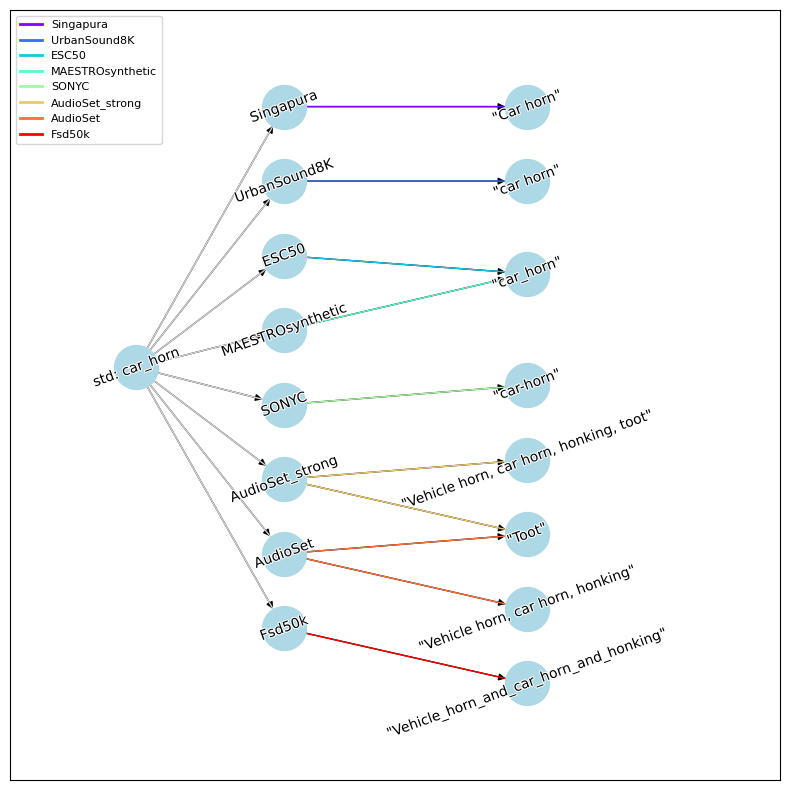

In [15]:
e.plot_std_label_mapping('car_horn')

Notice that the root node corresponds to the standard label, intermediate nodes represent the mapped datasets and finally the leaf nodes are the default dataset labels mapped to the particular standard label.


Next, let's visualize the hierarchical structure of a standard label.

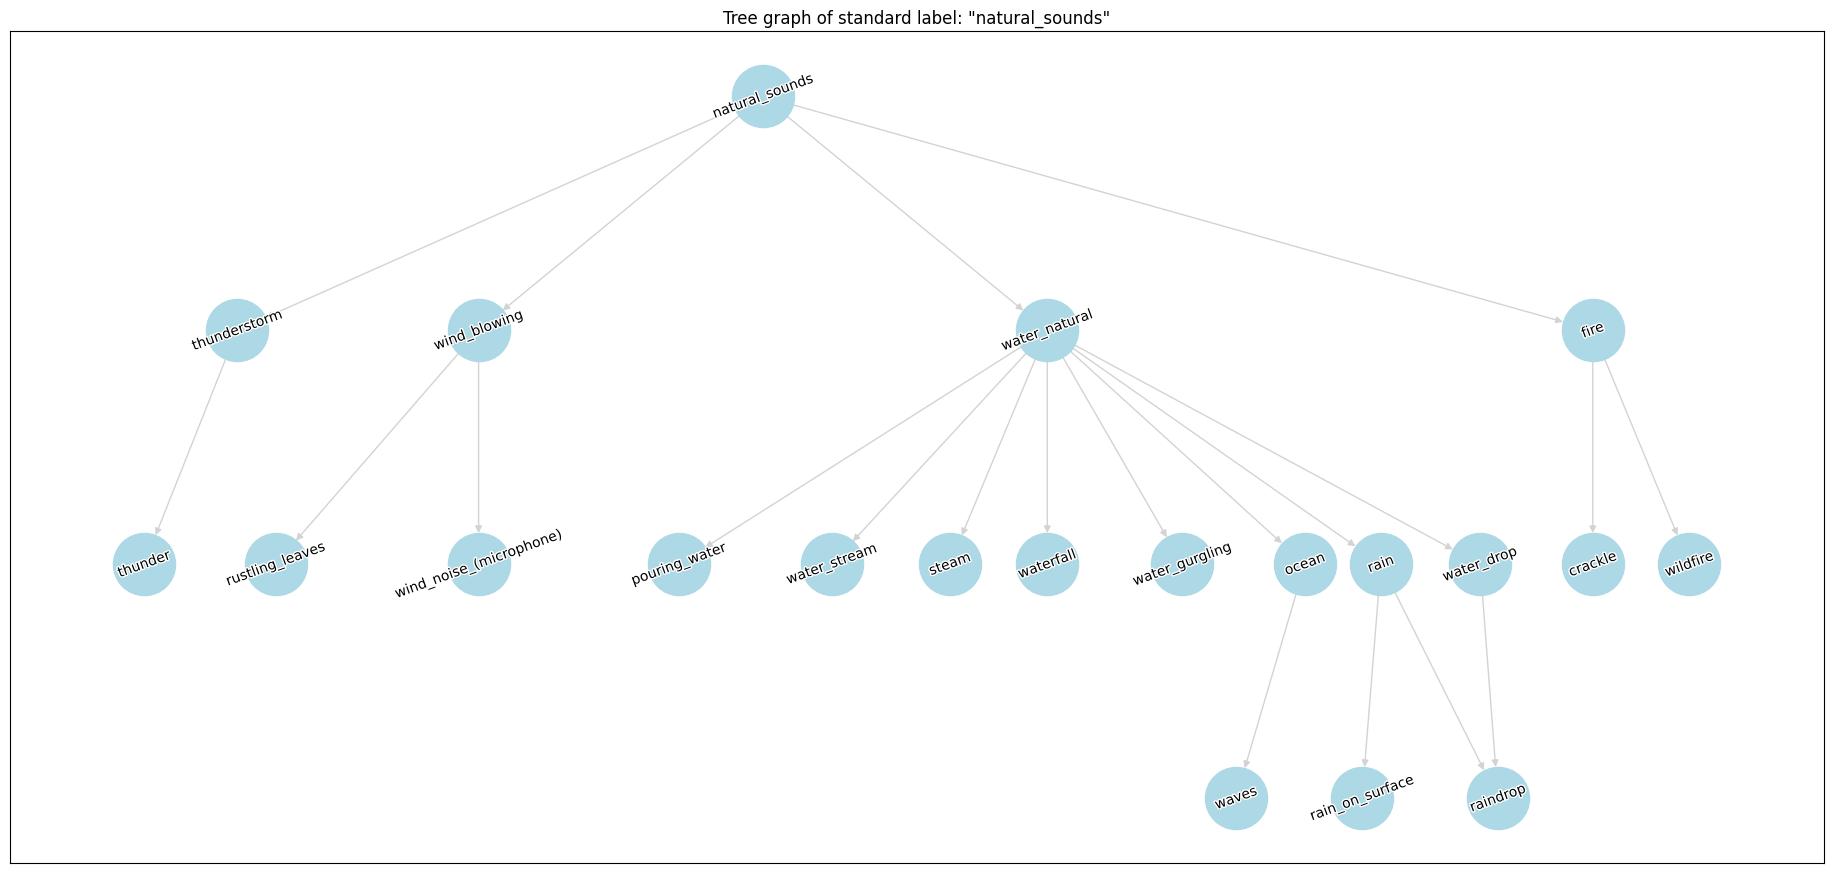

In [16]:
e.plot_hierarchical_tree_graph('natural_sounds')

And finally, let's visualize a dataset's tree graphs through the viewpoint of *SALT*: That is, plotting the hierarchical structure of the standard labels that correpsond to this particular dataset. Let's see for example the graphs of ESC-50.

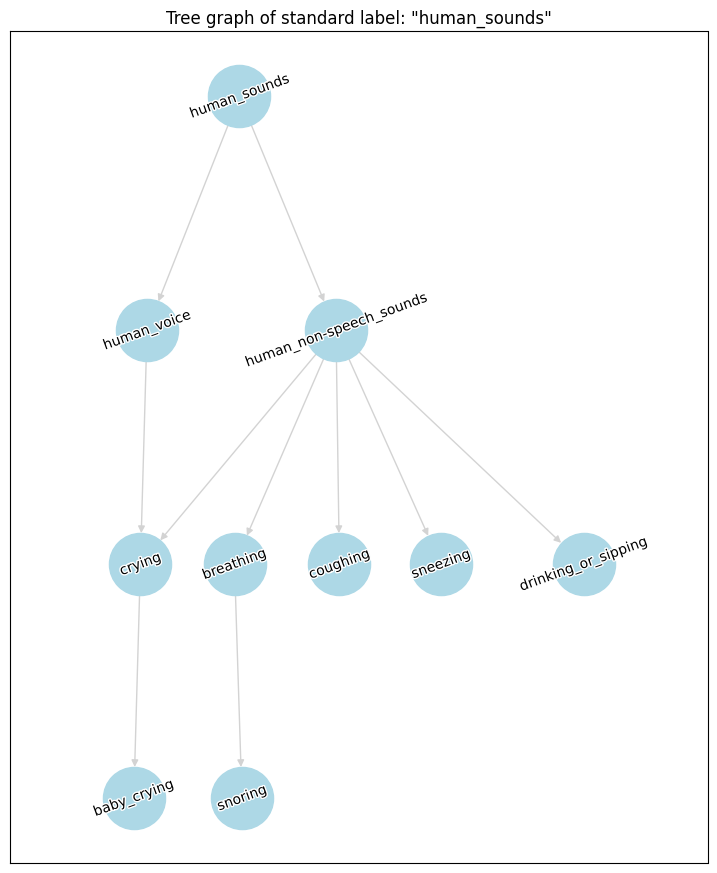

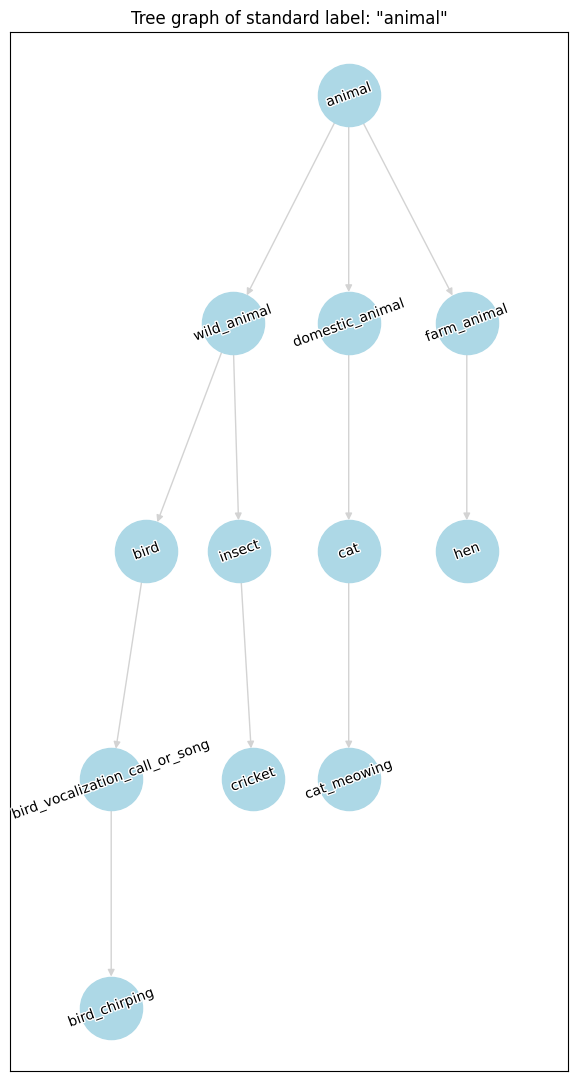

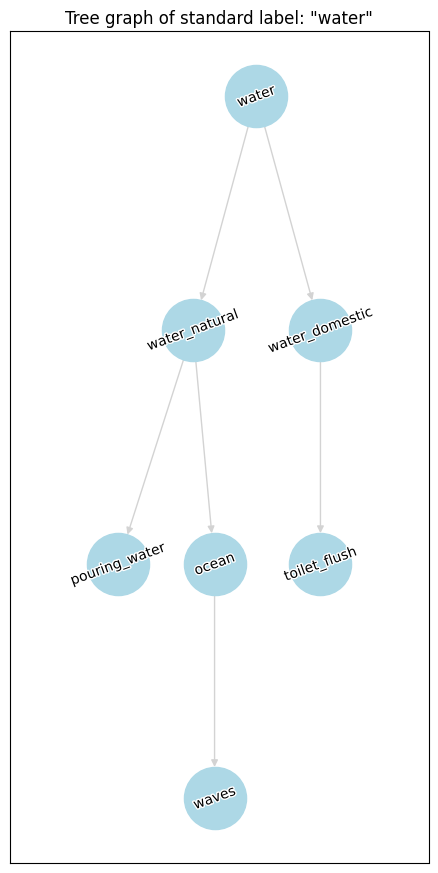

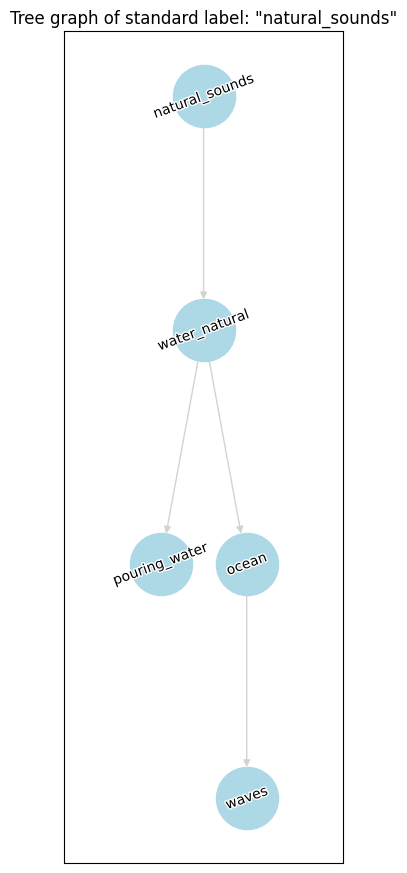

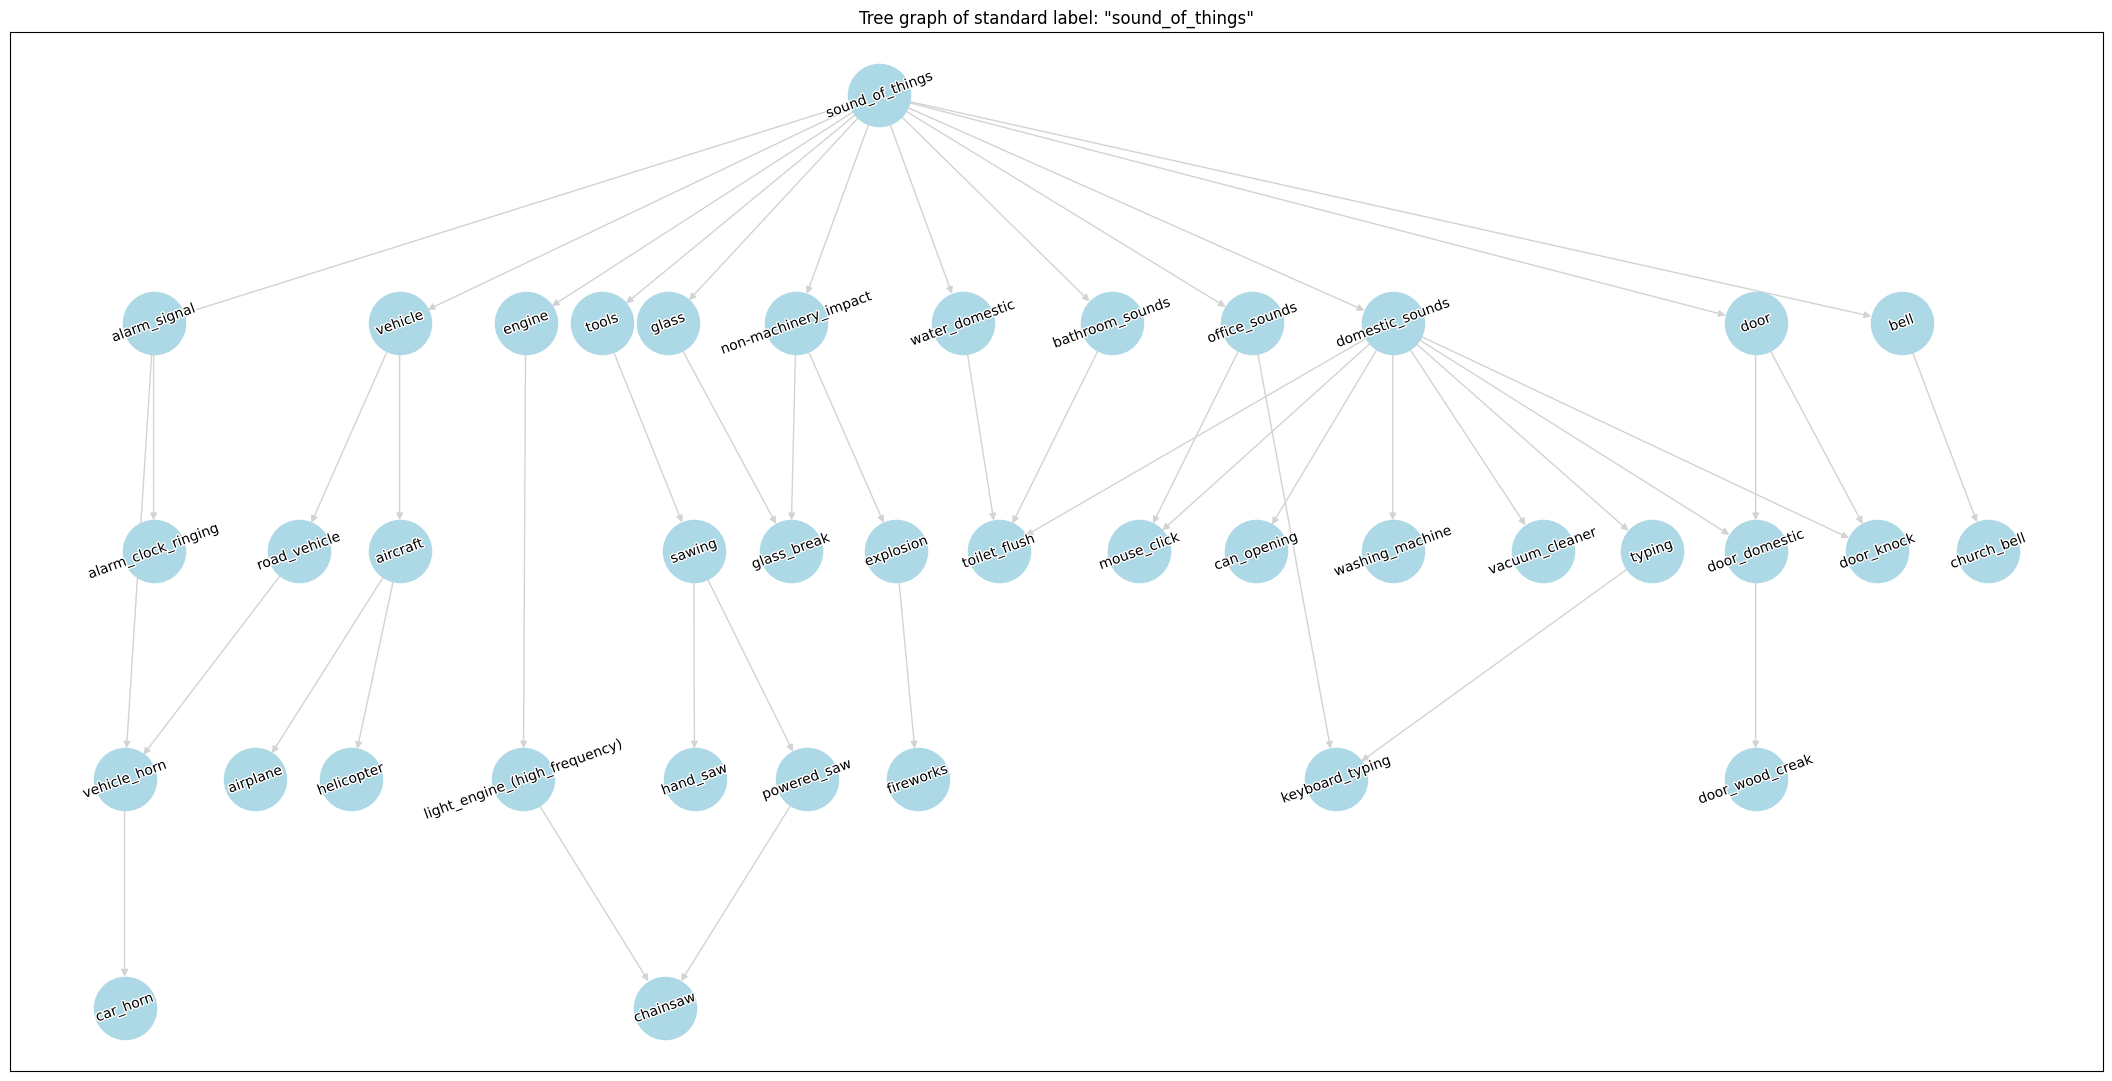

In [17]:
e.plot_dataset_tree_graph('ESC50')

In [18]:
e.get_children_labels_for_std_label('domestic_sounds')

['kettle_whistle',
 'sink_(filling_or_washing)',
 'furniture_dragging',
 'vacuum_cleaner',
 'broadband_noise',
 'video_game/tv',
 'electric_shaver',
 'mouse_click',
 'can_opening',
 'washing_machine',
 'cutlery_or_dishes',
 'dishwasher',
 'cupboard_open_or_close',
 'hook_and_loop_fastener',
 'paper_rustling',
 'crockery_breaking_and_smashing',
 'shuffling_cards',
 'radio',
 'drawer_open_or_close',
 'smoke_extractor',
 'microwave_oven',
 'object_fall',
 'switch_on_or_off',
 'window_opens_or_closes',
 'keys_jangling',
 'typing',
 'doorbell',
 'coin_dropping',
 'cooking',
 'duct_tape',
 'scissors',
 'bathtub_(filling_or_washing)',
 'writing',
 'zipper_(clothing)',
 'shower',
 'brushing_teeth',
 'toilet_flush',
 'refrigerator',
 'chopping_food',
 'door_domestic',
 'door_knock',
 'sliding_door',
 'blender',
 'hair_dryer',
 'television']